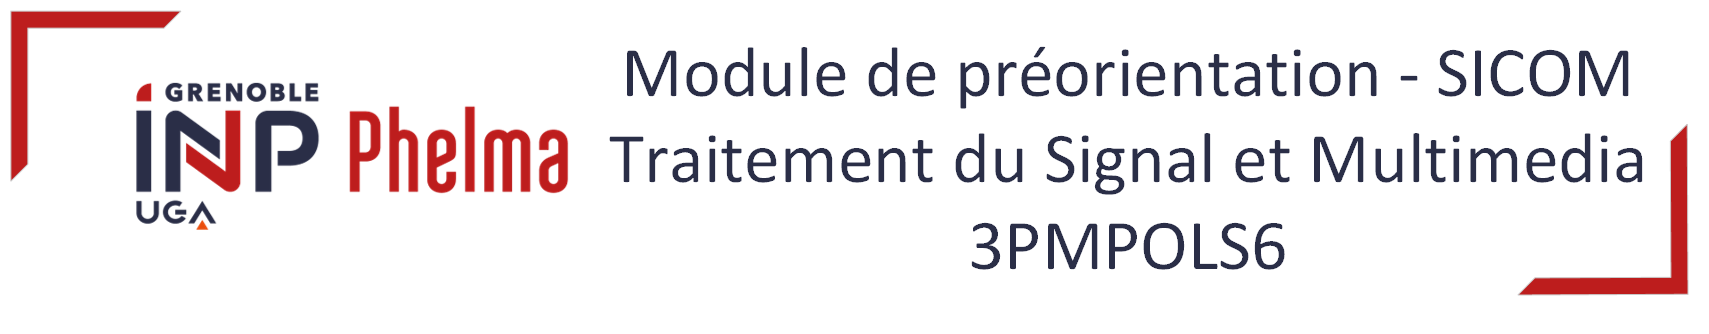

**Objectifs de ce TD :**

- 🖼️ Comprendre les **réseaux de neurones de convolution (CNN)**
- 🧠 Comprendre les différences de fonctionnement entre les réseaux de neurones **denses** et de **convolution**
- 📈 Comprendre l’impact des différentes couches de neurones sur la **performance** des réseaux de neurones
___
## Présentation du jeu de données

<img src="https://storage.googleapis.com/tfds-data/visualization/fig/fashion_mnist-3.0.1.png" alt="Fashion MNIST" style="height:400px;"/>

Le jeu de données <a href="https://fr.wikipedia.org/wiki/Fashion_MNIST" target="_blank">**Fashion MNIST**</a> est un **ensemble de données** utilisé en **vision par ordinateur**. Il a été créé comme une **alternative** au célèbre jeu de données <a href="https://fr.wikipedia.org/wiki/Base_de_données_MNIST#:~:text=La%20base%20de%20données%20MNIST,chiffres%20de%20la%20base%20MNIST." target="_blank">**MNIST**</a> (Modified National Institute of Standards and Technology database), qui est composé de **chiffres manuscrits**. Au lieu de chiffres du jeu de données MNIST, il contient des **images en niveaux de gris de vêtements**. Chaque image est de taille **28x28 pixels** : la classification d'images est donc relativement simple mais néanmoins plus complexe qu'avec le jeu de données MNIST. Les classes du jeu de données sont les suivantes :
- Classe N°0 - **T-shirt/top**
- Classe N°1 - **Pantalon**
- Classe N°2 - **Pull**
- Classe N°3 - **Robe**
- Classe N°4 - **Manteau**
- Classe N°5 - **Sandale**
- Classe N°6 - **Chemise**
- Classe N°7 - **Basket**
- Classe N°8 - **Sac**
- Classe N°9 - **Bottine**

Lien vers le dépôt Github des données : https://github.com/zalandoresearch/fashion-mnist
___


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
import matplotlib.pyplot as plt
import random

## Présentation du jeu de données

- Affichage des données
- Analyse des données et des étiquettes

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
def create_new_dataset(dataset, rand=True, zero=True):
    new_size = (56, 56)
    positions = ["haut_gauche", "haut_droite", "bas_gauche", "bas_droite"]
    new_dataset = list()
    for image in dataset:
        if zero is True:
            new_image = np.zeros((56, 56))
        else:
            new_image = np.random.rand(56, 56)
        if rand is True:
            pos_x = random.randint(0, 56-28)
            pos_y = random.randint(0, 56-28)
            new_image[pos_x:pos_x+28, pos_y:pos_y+28] = image.reshape(28, 28)
        else:
            pos = random.choice(positions)
            if pos=="haut_gauche":
                new_image[0:28, 0:28] = image.reshape(28, 28)
            elif pos=="haut_droite":
                new_image[0:28, 28:] = image.reshape(28, 28)
            elif pos=="bas_gauche":
                new_image[28:, 0:28] = image.reshape(28, 28)
            elif pos=="bas_droite":
                new_image[28:, 28:] = image.reshape(28, 28)
        new_dataset.append(new_image.reshape(56, 56, 1))
    new_dataset = np.array(new_dataset)
    return new_dataset

## Jeu de données d'origine

In [ ]:
print(x_train.shape, x_test.shape)
plt.imshow(x_train[2], cmap='gray')
plt.show()

In [ ]:
print("Réseau dense")
model_FCN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(180, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

print(model_FCN.summary())

batch_size = 128
epochs = 3

model_FCN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_FCN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model_FCN.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
print("Réseau CNN")
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(100, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(70, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
print(model.summary())

batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Jeu de données haut/bas/gauche/droite sans bruit

In [ ]:
input_shape = (56, 56, 1)
new_x_train = create_new_dataset(x_train, rand=False, zero=True)
new_x_test = create_new_dataset(x_test, rand=False, zero=True)
print(new_x_train.shape, new_x_test.shape)
plt.imshow(new_x_train[2], cmap='gray')
plt.show()

In [ ]:
print("Réseau dense")
model_FCN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(45, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

print(model_FCN.summary())

batch_size = 128
epochs = 3

model_FCN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_FCN.fit(new_x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model_FCN.evaluate(new_x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
print("Réseau CNN")
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(50, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(21, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
print(model.summary())

batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(new_x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(new_x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Jeu de données haut/bas/gauche/droite avec bruit

In [ ]:
new_x_train = create_new_dataset(x_train, rand=False, zero=False)
new_x_test = create_new_dataset(x_test, rand=False, zero=False)
print(new_x_train.shape, new_x_test.shape)
plt.imshow(new_x_train[5], cmap='gray')
plt.show()

In [ ]:
print("Réseau dense")
model_FCN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(45, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

print(model_FCN.summary())

batch_size = 128
epochs = 3

model_FCN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_FCN.fit(new_x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model_FCN.evaluate(new_x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
print("Réseau CNN")
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(50, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(21, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
print(model.summary())

batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(new_x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(new_x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Jeu de données aléatoire sans bruit

In [ ]:
new_x_train = create_new_dataset(x_train, rand=True, zero=True)
new_x_test = create_new_dataset(x_test, rand=True, zero=True)
print(new_x_train.shape, new_x_test.shape)
plt.imshow(new_x_train[5], cmap='gray')
plt.show()

In [ ]:
print("Réseau dense")
model_FCN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(45, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

print(model_FCN.summary())

batch_size = 128
epochs = 3

model_FCN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_FCN.fit(new_x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model_FCN.evaluate(new_x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
print("Réseau CNN")
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(50, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(21, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
print(model.summary())

batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(new_x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(new_x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Jeu de données aléatoire avec bruit

In [ ]:
new_x_train = create_new_dataset(x_train, rand=True, zero=False)
new_x_test = create_new_dataset(x_test, rand=True, zero=False)
print(new_x_train.shape, new_x_test.shape)
plt.imshow(new_x_train[5], cmap='gray')
plt.show()

In [ ]:
print("Réseau dense")
model_FCN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(45, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

print(model_FCN.summary())

batch_size = 128
epochs = 3

model_FCN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_FCN.fit(new_x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model_FCN.evaluate(new_x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
print("Réseau CNN")
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(50, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(21, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
print(model.summary())

batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(new_x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(new_x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

<a href="https://phelma.grenoble-inp.fr" target="_blank">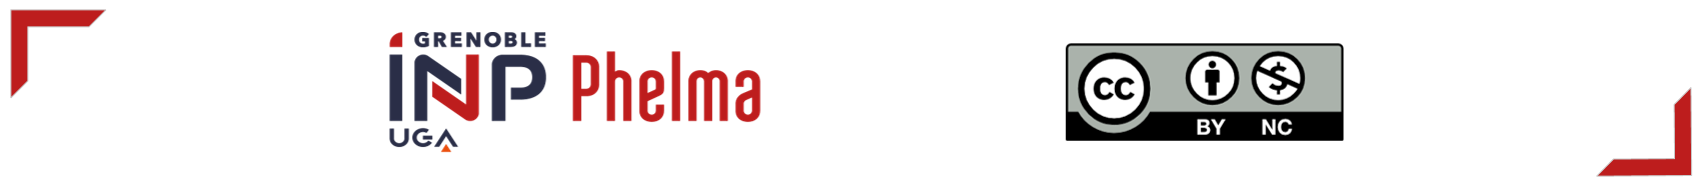</a>